#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)


#Load Dataset

In [9]:
df = pd.read_csv("sales_dataset.csv")
df.head()


,Date,Order_ID,Product,Category,Sub_Category,Quantity,Unit_Price,Region,City,Payment_Method,Customer_Age,Customer_Type
0,2024-01-01,ORD001,Laptop,Electronics,Computers,2,55000,North,Delhi,UPI,28,New
1,2024-01-01,ORD002,Mouse,Accessories,Input Devices,5,500,West,Mumbai,Credit Card,34,Returning
2,2024-01-02,ORD003,Keyboard,Accessories,Input Devices,3,800,South,Bangalore,Debit Card,22,New
3,2024-01-02,ORD004,Headphones,Electronics,Audio,4,1500,East,Kolkata,UPI,19,Returning
4,2024-01-03,ORD005,Laptop,Electronics,Computers,1,56000,South,Chennai,Credit Card,45,New


#Data Preprocessing

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Total_Sales'] = df['Quantity'] * df['Unit_Price']
df['Month'] = df['Date'].dt.to_period('M')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            30 non-null     datetime64[ns]
 1   Order_ID        30 non-null     object        
 2   Product         30 non-null     object        
 3   Category        30 non-null     object        
 4   Sub_Category    30 non-null     object        
 5   Quantity        30 non-null     int64         
 6   Unit_Price      30 non-null     int64         
 7   Region          30 non-null     object        
 8   City            30 non-null     object        
 9   Payment_Method  30 non-null     object        
 10  Customer_Age    30 non-null     int64         
 11  Customer_Type   30 non-null     object        
 12  Total_Sales     30 non-null     int64         
 13  Month           30 non-null     period[M]     
dtypes: datetime64[ns](1), int64(4), object(8), period[M](1)
memo

#Basic KPIs

In [11]:
print("Total Revenue:", df['Total_Sales'].sum())
print("Total Orders:", df['Order_ID'].nunique())
print("Total Quantity Sold:", df['Quantity'].sum())
print("Average Order Value:", df['Total_Sales'].mean())


Total Revenue: 678000
Total Orders: 30
Total Quantity Sold: 92
Average Order Value: 22600.0


#Product-Level Analysis

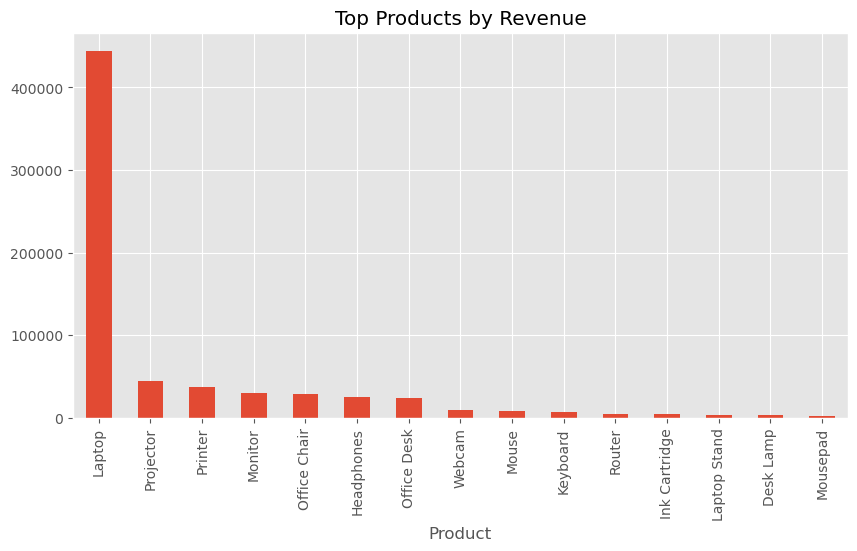

In [12]:
top_products = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title="Top Products by Revenue")
plt.show()


#Category & Sub-Category Analysis

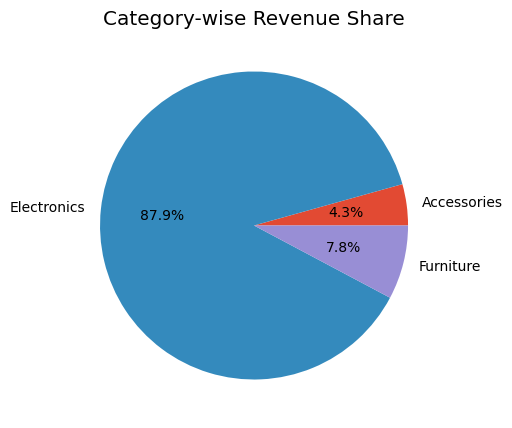

In [13]:
category_sales = df.groupby("Category")["Total_Sales"].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', ylabel="", title="Category-wise Revenue Share")
plt.show()


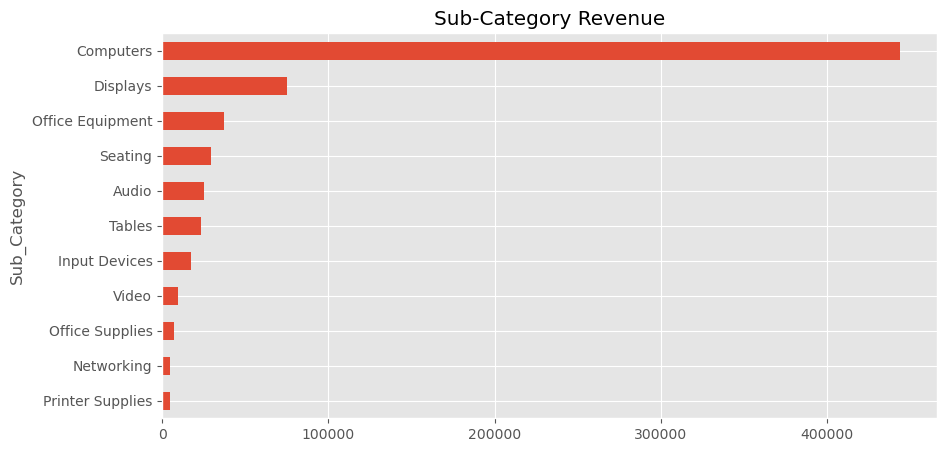

In [14]:
subcat_sales = df.groupby("Sub_Category")["Total_Sales"].sum().sort_values()
subcat_sales.plot(kind='barh', title="Sub-Category Revenue")
plt.show()


#Region & City Analysis

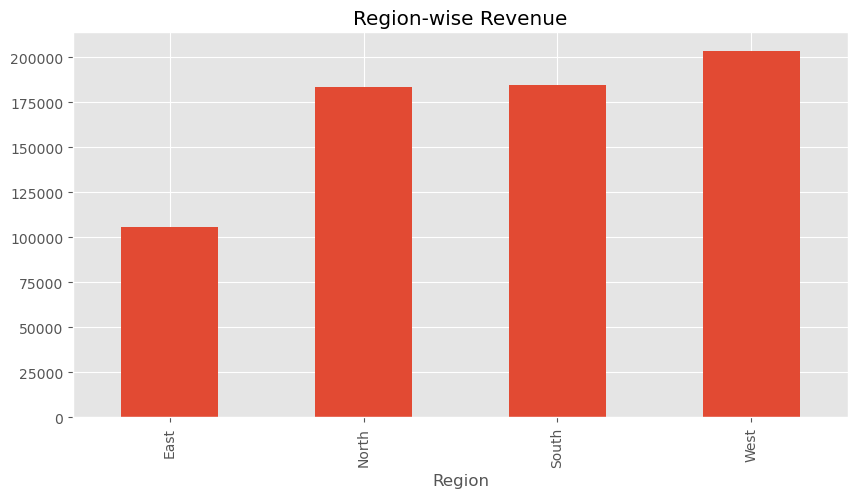

In [15]:
region_sales = df.groupby("Region")["Total_Sales"].sum()
region_sales.plot(kind='bar', title="Region-wise Revenue")
plt.show()


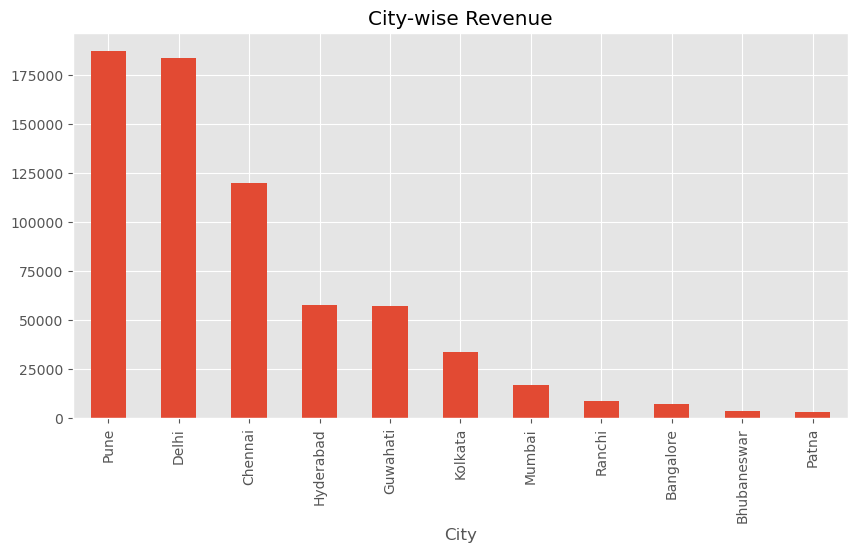

In [16]:
city_sales = df.groupby("City")["Total_Sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', title="City-wise Revenue")
plt.show()


#Payment Method Analysis

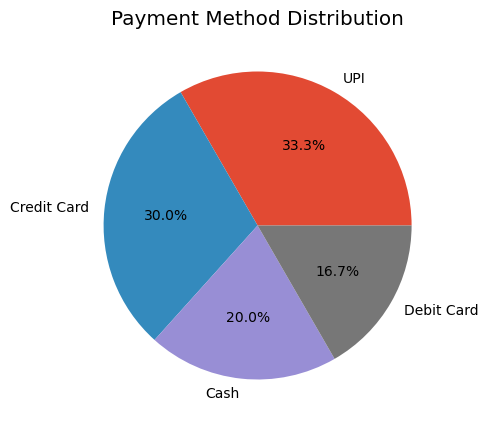

In [17]:
df["Payment_Method"].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel="", title="Payment Method Distribution")
plt.show()


#Customer Insights

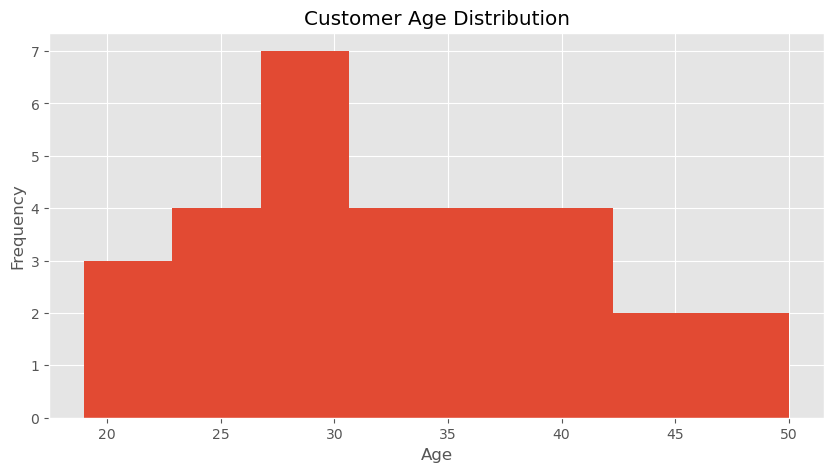

In [18]:
df["Customer_Age"].plot(kind='hist', bins=8, title="Customer Age Distribution")
plt.xlabel("Age")
plt.show()


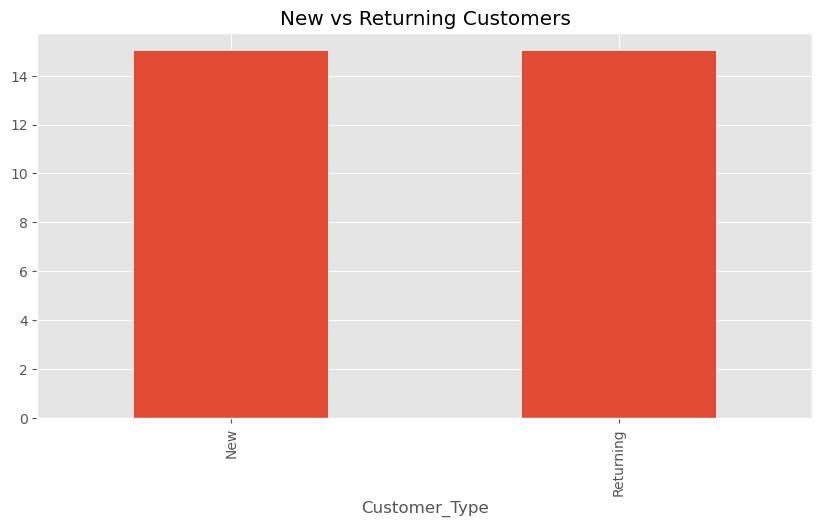

In [19]:
df["Customer_Type"].value_counts().plot(kind='bar', title="New vs Returning Customers")
plt.show()


#Time Series Analysis

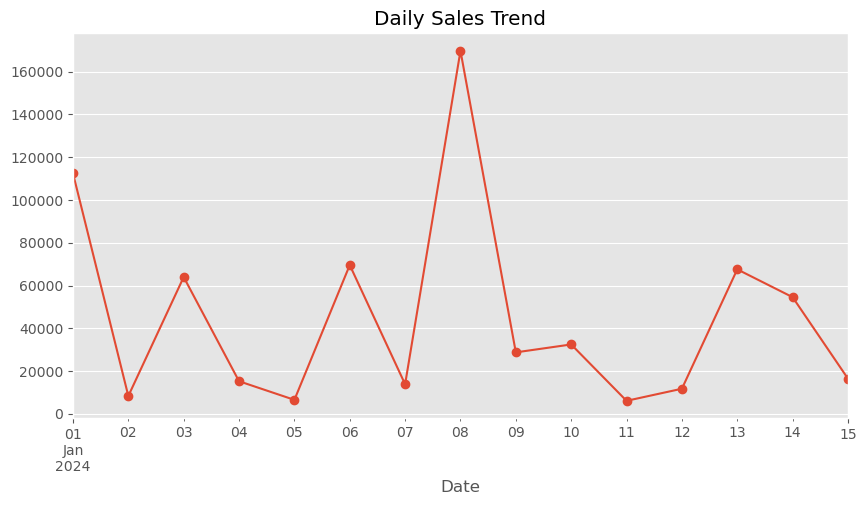

In [20]:
df.groupby("Date")["Total_Sales"].sum().plot(kind='line', marker='o', title="Daily Sales Trend")
plt.show()


C:\Users\sonus\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


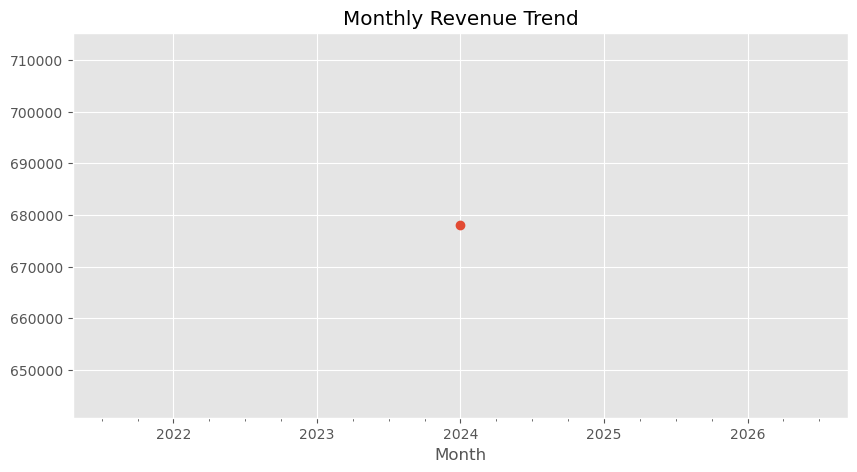

In [25]:
df.groupby("Month")["Total_Sales"].sum().plot(kind='line', marker='o', title="Monthly Revenue Trend")
plt.show()


#Deep Analysis

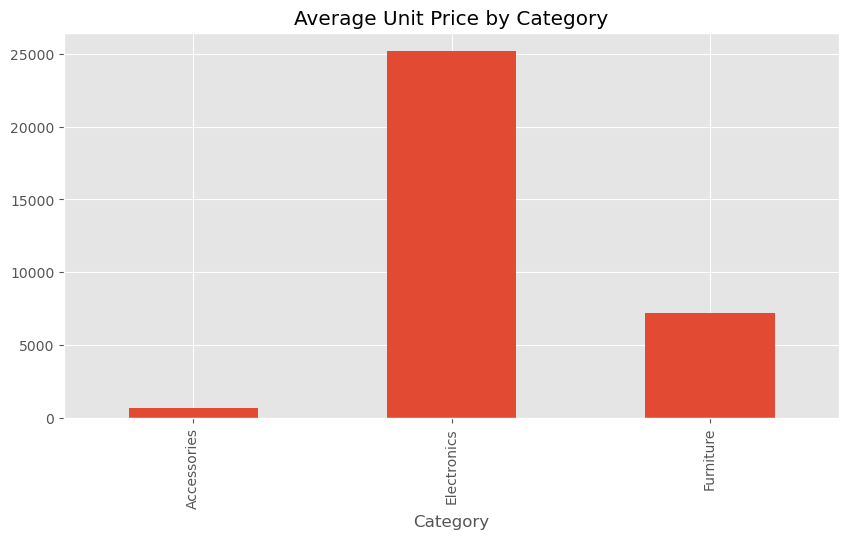

In [31]:
avg_price = df.groupby("Category")["Unit_Price"].mean()
avg_price.plot(kind="bar", title="Average Unit Price by Category")
plt.show()


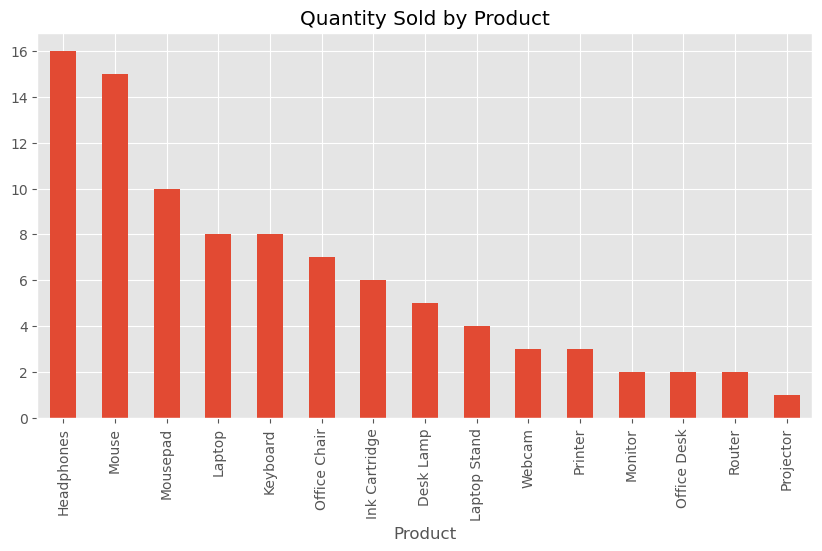

In [23]:
df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).plot(kind='bar', title="Quantity Sold by Product")
plt.show()


#Correlation Analysis

In [24]:
corr = df[["Quantity", "Unit_Price", "Customer_Age", "Total_Sales"]].corr()
print(corr)


              Quantity  Unit_Price  Customer_Age  Total_Sales
Quantity      1.000000   -0.498390     -0.504572    -0.309864
Unit_Price   -0.498390    1.000000      0.246104     0.847430
Customer_Age -0.504572    0.246104      1.000000     0.173806
Total_Sales  -0.309864    0.847430      0.173806     1.000000


#Pivot Table

pivot = pd.pivot_table(
    df,
    values="Total_Sales",
    index="Product",
    columns="Region",
    aggfunc="sum",
    fill_value=0
)
pivot


In [32]:
#Best Seller Report

In [27]:
best = df.loc[df.groupby("Product")["Total_Sales"].idxmax()]
best


,Date,Order_ID,Product,Category,Sub_Category,Quantity,Unit_Price,Region,City,Payment_Method,Customer_Age,Customer_Type,Total_Sales,Month
29,2024-01-15,ORD030,Desk Lamp,Accessories,Office Supplies,5,700,East,Kolkata,UPI,25,New,3500,2024-01
15,2024-01-08,ORD016,Headphones,Electronics,Audio,5,1550,North,Delhi,Credit Card,31,New,7750,2024-01
17,2024-01-09,ORD018,Ink Cartridge,Accessories,Printer Supplies,6,800,South,Chennai,Debit Card,26,New,4800,2024-01
21,2024-01-11,ORD022,Keyboard,Accessories,Input Devices,3,850,South,Bangalore,Debit Card,29,New,2550,2024-01
14,2024-01-08,ORD015,Laptop,Electronics,Computers,3,54000,West,Pune,Cash,37,Returning,162000,2024-01
20,2024-01-11,ORD021,Laptop Stand,Accessories,Office Supplies,4,900,East,Bhubaneswar,UPI,42,Returning,3600,2024-01
18,2024-01-10,ORD019,Monitor,Electronics,Displays,2,15000,North,Delhi,Credit Card,38,Returning,30000,2024-01
7,2024-01-04,ORD008,Mouse,Accessories,Input Devices,6,550,East,Patna,UPI,23,Returning,3300,2024-01
19,2024-01-10,ORD020,Mousepad,Accessories,Input Devices,10,250,West,Mumbai,Cash,21,New,2500,2024-01
11,2024-01-06,ORD012,Office Chair,Furniture,Seating,3,4200,South,Hyderabad,Credit Card,29,New,12600,2024-01


#Customer Age Group Analysis

C:\Users\sonus\AppData\Local\Temp\ipykernel_14900\771277294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Total_Sales"].sum().plot(kind='bar', title="Revenue by Age Group")


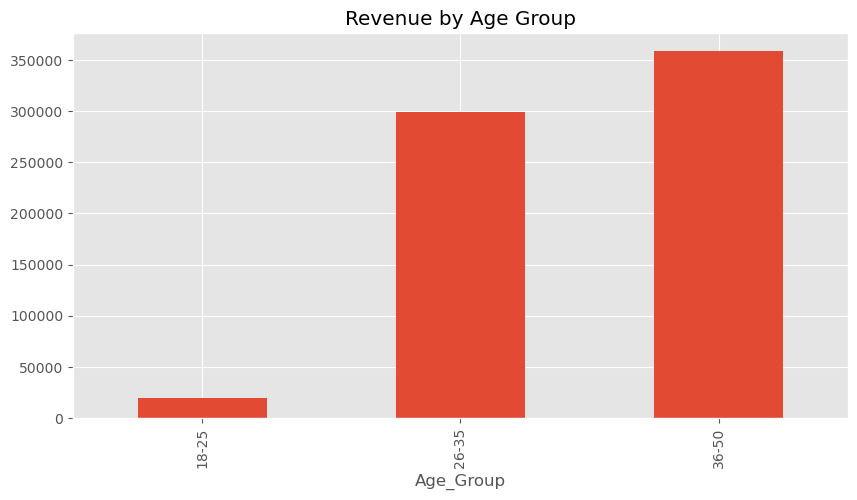

In [28]:
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[18,25,35,50], labels=['18-25','26-35','36-50'])

df.groupby("Age_Group")["Total_Sales"].sum().plot(kind='bar', title="Revenue by Age Group")
plt.show()
